In [1]:
import pandas, numpy

In [2]:
import scipy, scipy.stats

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':30,
                            'font.family':'sans-serif', 
                            'xtick.labelsize':20, 
                            'ytick.labelsize':20, 
                            'figure.figsize':(16, 9)})

In [4]:
inputfile = 'gnomAD_v2.1.1_ENSG00000187098_2023_05_21_14_22_35.csv'
disordered_regions = [(1, 54), (496, 526)] # from https://www.uniprot.org/uniprotkb/O75030/entry

In [5]:
disordered_aa = list(range(1, 54+1)) + list(range(496, 526+1))
print(disordered_aa)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526]


In [6]:
df = pandas.read_csv(inputfile, sep=',')
df.head()

,Chromosome,Position,rsIDs,Reference,Alternate,Source,Filters - exomes,Filters - genomes,Transcript,HGVS Consequence,...,Homozygote Count European (non-Finnish),Hemizygote Count European (non-Finnish),Allele Count Other,Allele Number Other,Homozygote Count Other,Hemizygote Count Other,Allele Count South Asian,Allele Number South Asian,Homozygote Count South Asian,Hemizygote Count South Asian
0,3,69788762,rs1413689457,C,A,gnomAD Genomes,NaN,PASS,ENST00000352241.4,p.Ser5Ter,...,0,0,0,1088,0,0,0,0,0,0
1,3,69788763,rs1463295899,G,C,gnomAD Exomes,PASS,NaN,ENST00000352241.4,p.Ser5Ser,...,0,0,0,5082,0,0,0,25186,0,0
2,3,69788764,rs1207755717,G,A,gnomAD Exomes,PASS,NaN,ENST00000352241.4,p.Gly6Arg,...,0,0,0,5096,0,0,0,25212,0,0
3,3,69788766,rs767644021,G,T,gnomAD Genomes,NaN,PASS,ENST00000352241.4,p.Gly6Gly,...,0,0,0,1088,0,0,0,0,0,0
4,3,69788773,rs979674711,C,G,gnomAD Genomes,NaN,PASS,ENST00000352241.4,p.Pro9Ala,...,0,0,0,1088,0,0,0,0,0,0


In [7]:
wdf = df.loc[:, ['HGVS Consequence', 'Allele Frequency', 'VEP Annotation']]

In [8]:
set(df['VEP Annotation'].to_list())

{'frameshift_variant',
 'inframe_deletion',
 'inframe_insertion',
 'missense_variant',
 'splice_donor_variant',
 'start_lost',
 'stop_gained',
 'synonymous_variant'}

In [9]:
syn_ordered = []
syn_disordered = []
other_ordered = []
other_disordered = []

In [10]:
for row in wdf.iterrows():
    change = row[1].values[0]
    print(row)
    
    # determine position
    string_number = ''
    for element in change:
        try:
            check = int(element)
            string_number = string_number + element
        except:
            pass
    position = int(string_number)
    print(position)
    
    # determine consequence
    consequence = row[1].values[2]
    print(consequence)
    
    # determine frequency
    frequency = numpy.log10(float(row[1].values[1]))
    print(frequency)
    
    # sort
    if position in disordered_aa:
        if consequence == 'synonymous_variant':
            syn_disordered.append(frequency)
        else:
            other_disordered.append(frequency)
    else:
        if consequence == 'synonymous_variant':
            syn_ordered.append(frequency)
        else:
            other_ordered.append(frequency)
            
    
    print()
            


(0, HGVS Consequence      p.Ser5Ter
Allele Frequency       0.000032
VEP Annotation      stop_gained
Name: 0, dtype: object)
5
stop_gained
-4.49643144518506

(1, HGVS Consequence             p.Ser5Ser
Allele Frequency              0.000005
VEP Annotation      synonymous_variant
Name: 1, dtype: object)
5
synonymous_variant
-5.288352084381319

(2, HGVS Consequence           p.Gly6Arg
Allele Frequency            0.000005
VEP Annotation      missense_variant
Name: 2, dtype: object)
6
missense_variant
-5.2898162956909145

(3, HGVS Consequence             p.Gly6Gly
Allele Frequency              0.000032
VEP Annotation      synonymous_variant
Name: 3, dtype: object)
6
synonymous_variant
-4.4963760540129565

(4, HGVS Consequence           p.Pro9Ala
Allele Frequency            0.000032
VEP Annotation      missense_variant
Name: 4, dtype: object)
9
missense_variant
-4.496265250470523

(5, HGVS Consequence          p.Glu12Asp
Allele Frequency             0.00001
VEP Annotation      missense_varian

In [12]:
print(scipy.stats.ttest_ind(syn_ordered, syn_disordered))
print(scipy.stats.ttest_ind(other_ordered, other_disordered))

Ttest_indResult(statistic=-1.2872515508393279, pvalue=0.2001459595725404)
Ttest_indResult(statistic=-1.10792963167894, pvalue=0.26872686918803307)


In [11]:
# checking dn/ds
print(scipy.stats.ttest_ind(syn_ordered, other_ordered))
print(scipy.stats.ttest_ind(syn_disordered, other_disordered))

Ttest_indResult(statistic=0.5428980721465277, pvalue=0.5875475179748181)
Ttest_indResult(statistic=0.9626372008734191, pvalue=0.3378410172069476)


In [13]:
my_plotting_data = [syn_ordered, syn_disordered, other_ordered, other_disordered] 
my_positions = [1, 2, 4, 5]
mycolors = ['skyblue', 'gold', 'skyblue', 'gold']

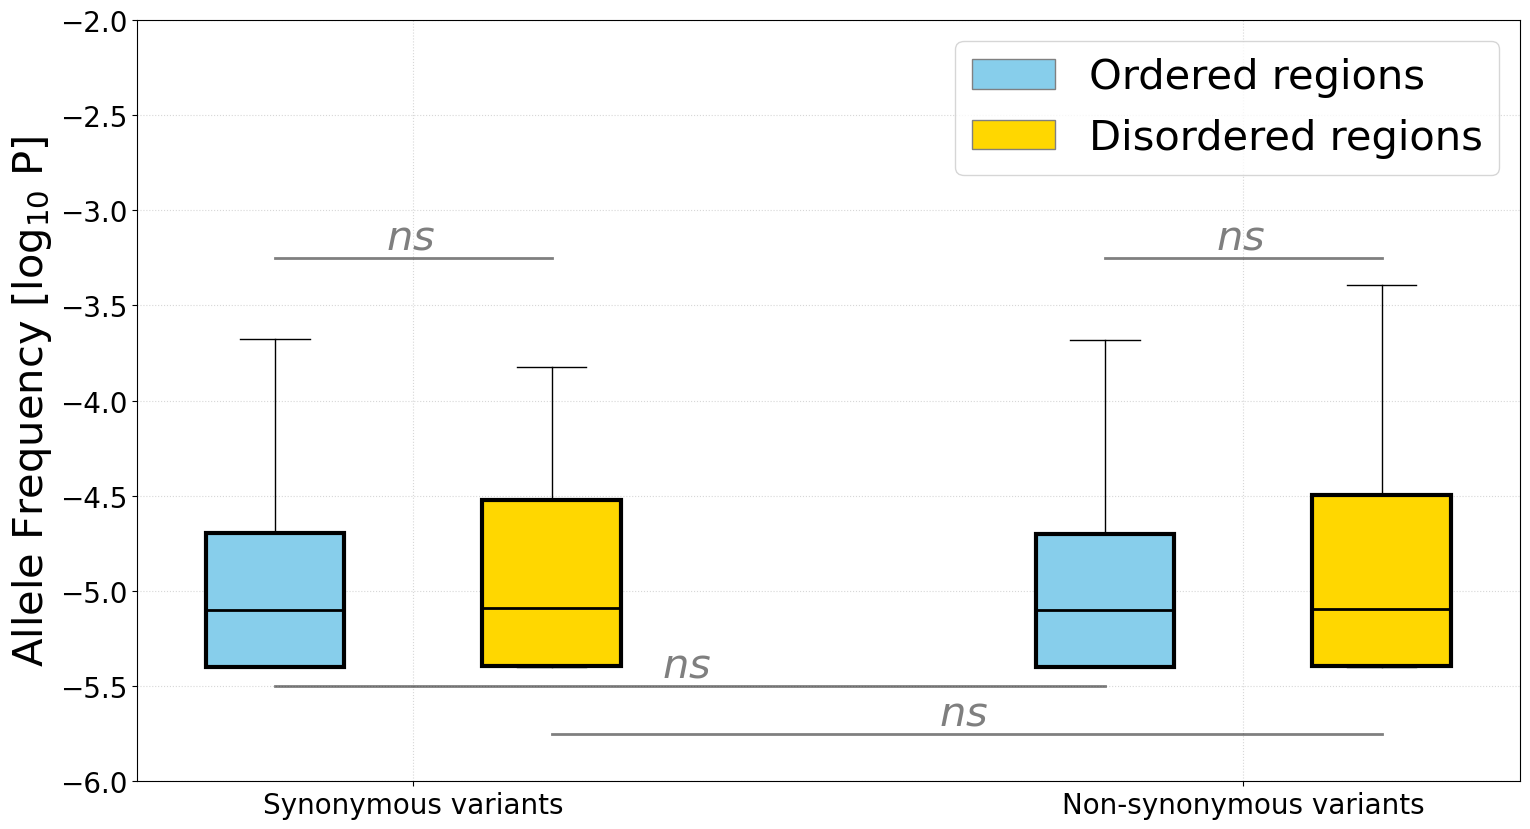

In [43]:
canvas = matplotlib.pyplot.boxplot(my_plotting_data, patch_artist=True, positions=my_positions, showfliers=False)

for patch, color in zip(canvas['boxes'], mycolors):
    patch.set_facecolor(color)
    
for box in canvas['boxes']:
    box.set(linewidth=3)

for median in canvas['medians']:
    median.set_color('black')
    median.set(linewidth=2)
    
# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='skyblue', edgecolor='gray'),
    matplotlib.patches.Patch(facecolor='gold', edgecolor='gray')
]
matplotlib.pyplot.legend(legend_elements, ['Ordered regions', 'Disordered regions'])


matplotlib.pyplot.ylabel('Allele Frequency [log$_{10}$ P]')
matplotlib.pyplot.xticks([1.5, 4.5], ['Synonymous variants', 'Non-synonymous variants'], rotation=0)

matplotlib.pyplot.ylim([-6, -2])

matplotlib.pyplot.plot([1, 4], [-5.5, -5.5], alpha=0.5, color='black', ls='-', lw=2)
matplotlib.pyplot.text(2.4, -5.45, '$ns$', alpha=0.5)

matplotlib.pyplot.plot([2, 5], [-5.75, -5.75], alpha=0.5, color='black', ls='-', lw=2)
matplotlib.pyplot.text(3.4, -5.7, '$ns$', alpha=0.5)

matplotlib.pyplot.plot([1, 2], [-3.25, -3.25], alpha=0.5, color='black', ls='-', lw=2)
matplotlib.pyplot.text(1.4, -3.2, '$ns$', alpha=0.5)

matplotlib.pyplot.plot([4, 5], [-3.25, -3.25], alpha=0.5, color='black', ls='-', lw=2)
matplotlib.pyplot.text(4.4, -3.2, '$ns$', alpha=0.5)

matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()

matplotlib.pyplot.show()